## Emission Intensity Analysis of U.S. Supply Chains: A Sectoral Comparison Using USEEIO GHG Factors

In the face of escalating climate change, understanding and managing greenhouse gas (GHG) emissions throughout the supply chain has become a critical priority for governments, businesses, and sustainability professionals. While much of the global focus has been on direct emissions (Scope 1) and energy-related emissions (Scope 2), indirect emissions embedded in purchased goods and services — known as Scope 3 emissions — often make up the majority of an organization’s total carbon footprint.

This project focuses on analyzing supply chain greenhouse gas emission factors provided by the U.S. Environmental Protection Agency (EPA) through the USEEIO (U.S. Environmentally Extended Input-Output) model. The dataset includes sector-specific emission factors per dollar spent, broken down by individual GHGs (CO₂, CH₄, N₂O) and aggregated as CO₂-equivalents (CO₂e). Importantly, the dataset offers emission factors both with and without profit margins, enabling a comparative analysis of how economic markups affect emissions accounting. This dataset was obtained from [Data.gov](https://catalog.data.gov/dataset/supply-chain-greenhouse-gas-emission-factors-v1-3-by-naics-6)

The primary objective of this project is to:

- Compare carbon intensity across U.S. industry sectors,

- Investigate the differences in emission estimates when using "with margin" vs "without margin" factors, and

- Identify high-impact sectors that contribute disproportionately to supply chain emissions.

By leveraging data science techniques such as exploratory data analysis (EDA), visualization, and ranking algorithms, this analysis aims to generate actionable insights that can guide sustainable procurement strategies, carbon accounting accuracy, and sectoral decarbonization efforts. The results may also support stakeholders in prioritizing supply chain interventions to reduce emissions and comply with evolving sustainability reporting standards such as the GHG Protocol and SEC climate disclosure rules.

### Key Variables

| **Column Name**                                | **Description**                                                                 |
|------------------------------------------------|---------------------------------------------------------------------------------|
| 2017 NAICS Code                              | Industry classification code (e.g., `221100` = Electric Power Generation)      |
| 2017 NAICS Title                             | Name of the NAICS industry sector                                               |
| GHG                                          | Type of greenhouse gas (e.g., `CO2`, `CH4`, `N2O`, or `CO2e`)                   |
| Unit (kg CO2e / 2022 USD, purchaser price)   | Emissions per 2022 USD in **CO2-equivalents** (aggregated GHG impact)          |
| Unit (kg / 2022 USD, purchaser price)        | Emissions per 2022 USD for **individual GHGs** (raw kg values)                 |
| Supply Chain Emission Factors without Margins| Emission factors **excluding** retailer/distributor margins                     |
| Margins of Supply Chain Emission Factors     | Amount added to emissions due to **profit margins and markups**                |
| Supply Chain Emission Factors with Margins   | Emission factors **including** profit margins                                   |
| Reference USEEIO Code                        | USEEIO model code linking to EPA economic-environmental models                 |


In [2]:
import pandas as pd

df = pd.read_csv('EmissionsGHG.csv')
df.head()

,2017 NAICS Code,2017 NAICS Title,GHG,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Reference USEEIO Code
0,111110,Soybean Farming,HFC-23,"kg/2022 USD, purchaser price",3.230000e-09,1.340000e-09,4.570000e-09,1111A0
1,111110,Soybean Farming,Carbon dioxide,"kg/2022 USD, purchaser price",1.340000e-01,3.780000e-02,1.720000e-01,1111A0
2,111110,Soybean Farming,HFC-236fa,"kg/2022 USD, purchaser price",1.440000e-10,2.020000e-10,3.450000e-10,1111A0
3,111110,Soybean Farming,Carbon tetrafluoride,"kg/2022 USD, purchaser price",5.130000e-09,5.970000e-09,1.110000e-08,1111A0
4,111110,Soybean Farming,HFC-32,"kg/2022 USD, purchaser price",3.000000e-08,4.200000e-08,7.200000e-08,1111A0


In [3]:
df2 = pd.read_csv('EmissionsCO2e.csv')
df2.head()

,2017 NAICS Code,2017 NAICS Title,GHG,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Reference USEEIO Code
0,111110,Soybean Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.488,0.044,0.532,1111A0
1,111120,Oilseed (except Soybean) Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.488,0.044,0.532,1111A0
2,111130,Dry Pea and Bean Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848,1111B0
3,111140,Wheat Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848,1111B0
4,111150,Corn Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848,1111B0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 8 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   2017 NAICS Code                                18288 non-null  int64  
 1   2017 NAICS Title                               18288 non-null  object 
 2   GHG                                            18288 non-null  object 
 3   Unit                                           18288 non-null  object 
 4   Supply Chain Emission Factors without Margins  18288 non-null  float64
 5   Margins of Supply Chain Emission Factors       18288 non-null  float64
 6   Supply Chain Emission Factors with Margins     18288 non-null  float64
 7   Reference USEEIO Code                          18288 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 1.1+ MB


In [7]:
df.shape

(18288, 8)

In [23]:
# check for nulls
df.isnull().sum()

2017 NAICS Code                                  0
2017 NAICS Title                                 0
GHG                                              0
Unit                                             0
Supply Chain Emission Factors without Margins    0
Margins of Supply Chain Emission Factors         0
Supply Chain Emission Factors with Margins       0
Reference USEEIO Code                            0
dtype: int64

In [24]:
df.columns = ["NAICS_Code", "NAICS_Title", "GHG_gas", "Units",
    "Emissions_Without_Margin",
    "Margin_Emissions", "Emissions_With_Margin",'USEEIO_code']
df = df.drop('Units', axis=1)
df.head()

,NAICS_Code,NAICS_Title,GHG_gas,Emissions_Without_Margin,Margin_Emissions,Emissions_With_Margin,USEEIO_code
0,111110,Soybean Farming,HFC-23,3.230000e-09,1.340000e-09,4.570000e-09,1111A0
1,111110,Soybean Farming,Carbon dioxide,1.340000e-01,3.780000e-02,1.720000e-01,1111A0
2,111110,Soybean Farming,HFC-236fa,1.440000e-10,2.020000e-10,3.450000e-10,1111A0
3,111110,Soybean Farming,Carbon tetrafluoride,5.130000e-09,5.970000e-09,1.110000e-08,1111A0
4,111110,Soybean Farming,HFC-32,3.000000e-08,4.200000e-08,7.200000e-08,1111A0


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 8 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   2017 NAICS Code                                1016 non-null   int64  
 1   2017 NAICS Title                               1016 non-null   object 
 2   GHG                                            1016 non-null   object 
 3   Unit                                           1016 non-null   object 
 4   Supply Chain Emission Factors without Margins  1016 non-null   float64
 5   Margins of Supply Chain Emission Factors       1016 non-null   float64
 6   Supply Chain Emission Factors with Margins     1016 non-null   float64
 7   Reference USEEIO Code                          1016 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 63.6+ KB


In [9]:
df2.shape

(1016, 8)

Lets focus on df2, because it provides a standardized and comprehensive view of climate impact across industries. Unlike raw emissions data, CO₂e values account for multiple GHGs (like methane and nitrous oxide) using their global warming potential, allowing for more accurate comparisons. This unit is also aligned with economic activity, making it ideal for analyzing emissions intensity per dollar spent in supply chains.

In [11]:
# check for nulls in df2
df2.isnull().sum()

2017 NAICS Code                                  0
2017 NAICS Title                                 0
GHG                                              0
Unit                                             0
Supply Chain Emission Factors without Margins    0
Margins of Supply Chain Emission Factors         0
Supply Chain Emission Factors with Margins       0
Reference USEEIO Code                            0
dtype: int64

**no null values detected in df2**

In [12]:
df2.head()

,2017 NAICS Code,2017 NAICS Title,GHG,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Reference USEEIO Code
0,111110,Soybean Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.488,0.044,0.532,1111A0
1,111120,Oilseed (except Soybean) Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.488,0.044,0.532,1111A0
2,111130,Dry Pea and Bean Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848,1111B0
3,111140,Wheat Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848,1111B0
4,111150,Corn Farming,All GHGs,"kg CO2e/2022 USD, purchaser price",0.809,0.040,0.848,1111B0


In [13]:
# renaming the columns for easier analysis
df2.columns = [
    "NAICS_Code", "NAICS_Title", "GHG", "Units",
    "Emissions_Without_Margin",
    "Margin_Emissions", "Emissions_With_Margin",'USEEIO_code'
]

In [ ]:
df2= df2.drop('Units', axis=1) #remove the units column, as it is irrelevant for analysis

In [20]:
df2.head()

,NAICS_Code,NAICS_Title,GHG,Emissions_Without_Margin,Margin_Emissions,Emissions_With_Margin,USEEIO_code
0,111110,Soybean Farming,All GHGs,0.488,0.044,0.532,1111A0
1,111120,Oilseed (except Soybean) Farming,All GHGs,0.488,0.044,0.532,1111A0
2,111130,Dry Pea and Bean Farming,All GHGs,0.809,0.040,0.848,1111B0
3,111140,Wheat Farming,All GHGs,0.809,0.040,0.848,1111B0
4,111150,Corn Farming,All GHGs,0.809,0.040,0.848,1111B0


## Exploratory Data Analysis

### 1. Top Emitting Sectors

Industries with the highest supply chain emissions per dollar.

In [21]:
# Top 10 industries by emissions with margin

top_emitters = df2.sort_values("Emissions_With_Margin", ascending=False).head(10)
top_emitters[["NAICS_Title", "GHG", "Emissions_With_Margin"]]


,NAICS_Title,GHG,Emissions_With_Margin
285,Cement Manufacturing,All GHGs,3.924
33,Dual-Purpose Cattle Ranching and Farming,All GHGs,2.893
31,Cattle Feedlots,All GHGs,2.893
30,Beef Cattle Ranching and Farming,All GHGs,2.893
32,Dairy Cattle and Milk Production,All GHGs,1.724
290,Lime Manufacturing,All GHGs,1.623
291,Gypsum Product Manufacturing,All GHGs,1.623
655,Pipeline Transportation of Refined Petroleum P...,All GHGs,1.619
653,Pipeline Transportation of Crude Oil,All GHGs,1.619
654,Pipeline Transportation of Natural Gas,All GHGs,1.619


### 2. GHG Distribution

Lets see how different types of GHG contribute to supply chain emssions.

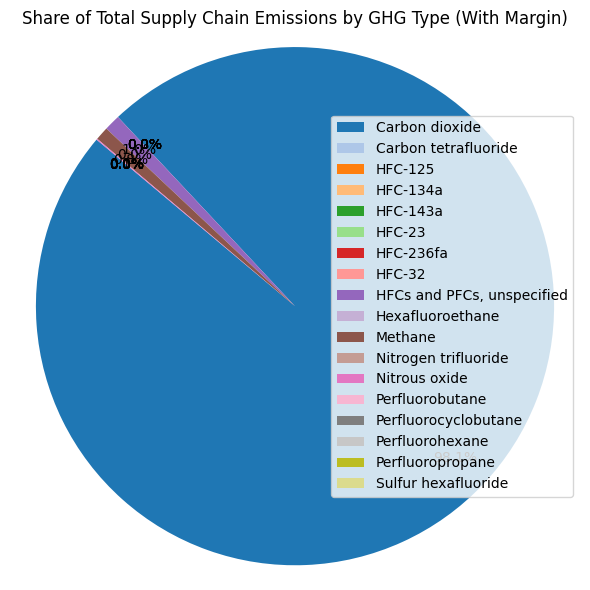

In [35]:
import matplotlib.pyplot as plt

# Group and sum emissions by GHG type
ghg_totals = df.groupby("GHG_gas")["Emissions_With_Margin"].sum()

# Plot pie chart
colors = plt.cm.tab20.colors  
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(
    ghg_totals,
    labels=None,
    colors=colors[:len(ghg_totals)],
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85
)
plt.legend(patches, ghg_totals.index, loc='best')
plt.title("Share of Total Supply Chain Emissions by GHG Type (With Margin)")
plt.axis('equal')
plt.tight_layout()
plt.show()



The pie chart shows the share of each greenhouse gas emitted by the Supply Chain industry. **Carbon dioxide, HFCs, PFCs, and Methane are the top 3 GHGs emitted.**

### 3. Sector-Level Aggregation

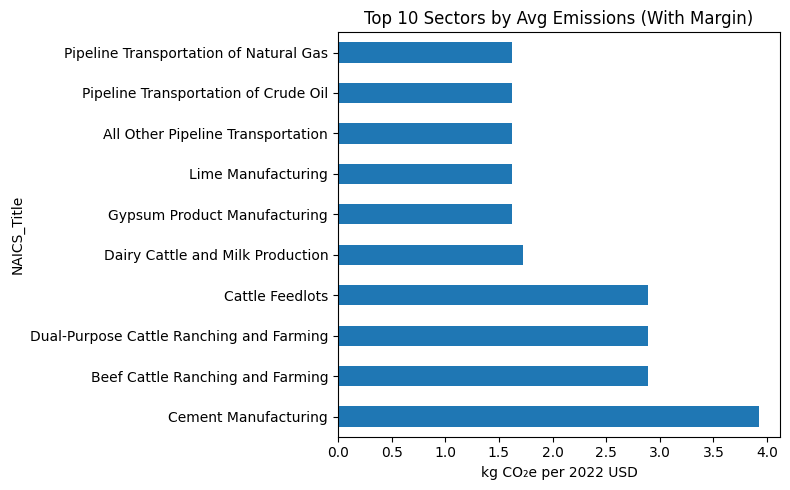

In [37]:
sector_emissions = (
    df2.groupby("NAICS_Title")["Emissions_With_Margin"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

sector_emissions.plot(kind='barh', figsize=(8, 5))
plt.title("Top 10 Sectors by Avg Emissions (With Margin)")
plt.xlabel("kg CO₂e per 2022 USD")
plt.tight_layout()
plt.show()


From the above bar chart, we can say that **Cement manufacturing industry emits the highest amount of GHGs, folowed by Beef farming and Cattle feeding.**

### 4. Ranking Industries by Emission Intensity

In [41]:
# Top 10 industries by emissions with margin
top_with_margin = df2.sort_values("Emissions_With_Margin", ascending=False).head(10)
print('Top 10 Industries by Emissions with Margin')
top_with_margin[["NAICS_Title", "Emissions_With_Margin"]]

Top 10 Industries by Emissions with Margin


,NAICS_Title,Emissions_With_Margin
285,Cement Manufacturing,3.924
33,Dual-Purpose Cattle Ranching and Farming,2.893
31,Cattle Feedlots,2.893
30,Beef Cattle Ranching and Farming,2.893
32,Dairy Cattle and Milk Production,1.724
290,Lime Manufacturing,1.623
291,Gypsum Product Manufacturing,1.623
655,Pipeline Transportation of Refined Petroleum P...,1.619
653,Pipeline Transportation of Crude Oil,1.619
654,Pipeline Transportation of Natural Gas,1.619


In [42]:
# Top 10 industries by emissions without margin
top_without_margin = df2.sort_values("Emissions_Without_Margin", ascending=False).head(10)
print('Top 10 Industries by Emissions without Margin')
top_without_margin[["NAICS_Title", "Emissions_Without_Margin"]]


Top 10 Industries by Emissions without Margin


,NAICS_Title,Emissions_Without_Margin
285,Cement Manufacturing,3.846
33,Dual-Purpose Cattle Ranching and Farming,2.847
31,Cattle Feedlots,2.847
30,Beef Cattle Ranching and Farming,2.847
32,Dairy Cattle and Milk Production,1.682
654,Pipeline Transportation of Natural Gas,1.619
656,All Other Pipeline Transportation,1.619
653,Pipeline Transportation of Crude Oil,1.619
655,Pipeline Transportation of Refined Petroleum P...,1.619
291,Gypsum Product Manufacturing,1.560


While the top 5 industries in both Divisions were same, it was interesting to see that **Pipeline Transportation of Natural Gas ranked higher in Emissions without margin list**

### 5. Visualizing Industry Rankings, with and without Margin

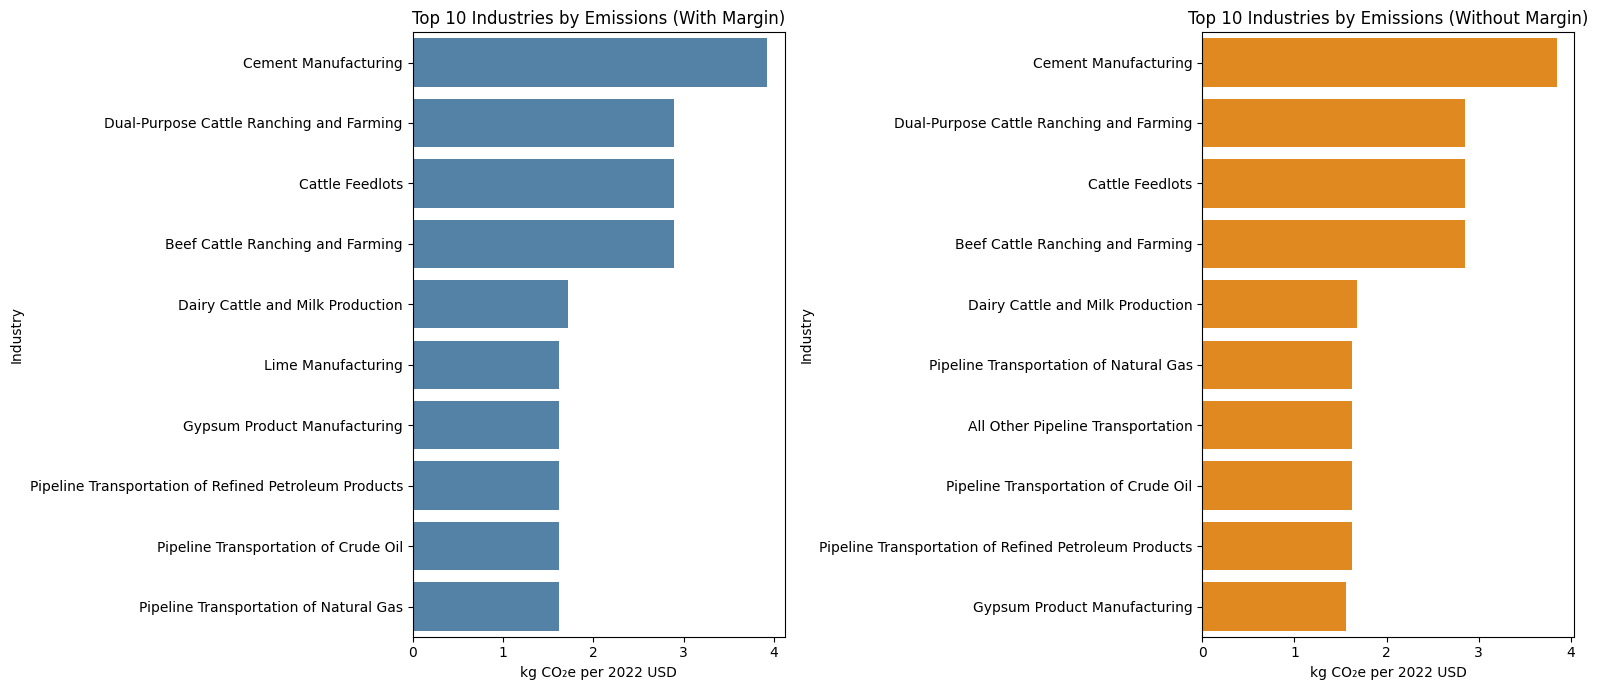

In [45]:
import seaborn as sns

plt.figure(figsize=(16, 7))

# Bar plot for emissions with margin, using a custom color
plt.subplot(1, 2, 1)
sns.barplot(
    data=top_with_margin, 
    y="NAICS_Title", 
    x="Emissions_With_Margin",
    color="steelblue"
)
plt.title("Top 10 Industries by Emissions (With Margin)")
plt.xlabel("kg CO₂e per 2022 USD")
plt.ylabel("Industry")

# Bar plot for emissions without margin, using a different custom color
plt.subplot(1, 2, 2)
sns.barplot(
    data=top_without_margin, 
    y="NAICS_Title", 
    x="Emissions_Without_Margin",
    color="darkorange"
)
plt.title("Top 10 Industries by Emissions (Without Margin)")
plt.xlabel("kg CO₂e per 2022 USD")
plt.ylabel("Industry")

plt.tight_layout()
plt.show()

### 6. Percent increase due to Margin

In [46]:
df2['Margin_Impact_Percent'] = (
    (df2['Emissions_With_Margin'] - df2['Emissions_Without_Margin']) 
    / df2['Emissions_Without_Margin']
) * 100

### 7. Visualizing the Margin impact distribution

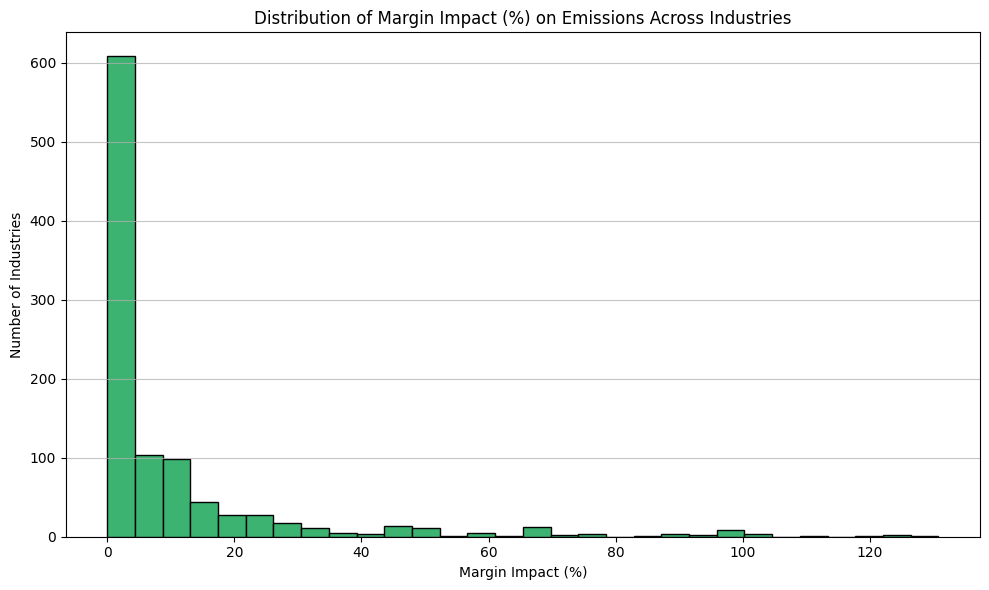

In [47]:

plt.figure(figsize=(10, 6))
plt.hist(df2['Margin_Impact_Percent'], bins=30, color='mediumseagreen', edgecolor='black')
plt.title('Distribution of Margin Impact (%) on Emissions Across Industries')
plt.xlabel('Margin Impact (%)')
plt.ylabel('Number of Industries')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()


### 8. Identifying Industries with highest Margin impact

In [49]:
top_margin_impact = df2.sort_values('Margin_Impact_Percent', ascending=False).head(10)
print('Top Industries with highest margin impact')
top_margin_impact[['NAICS_Title', 'Margin_Impact_Percent']]

Top Industries with highest margin impact


,NAICS_Title,Margin_Impact_Percent
351,Lawn and Garden Tractor and Home Lawn and Gard...,130.769231
424,Primary Battery Manufacturing,123.913043
686,Software Publishers,122.222222
249,Pharmaceutical Preparation Manufacturing,120.000000
394,Other Communications Equipment Manufacturing,110.526316
683,Directory and Mailing List Publishers,103.773585
685,All Other Publishers,103.773585
684,Greeting Card Publishers,103.773585
191,Cut and Sew Apparel Contractors,100.000000
189,Hosiery and Sock Mills,100.000000


### 9. Bar chart showing top 10 industries with the highest percentage margin impact on emissions

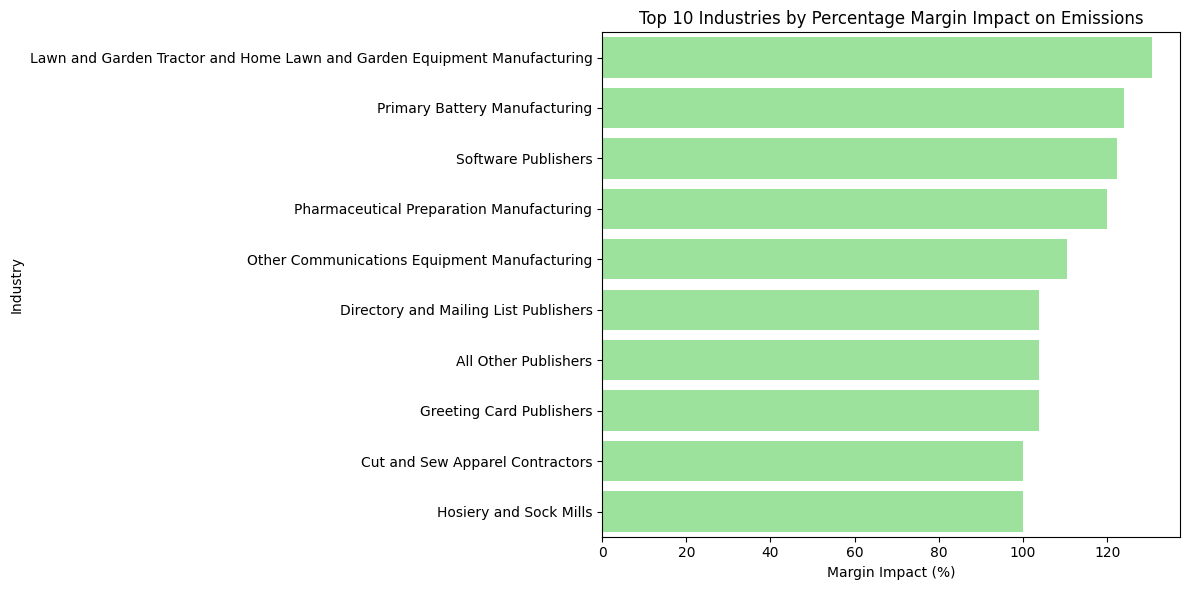

In [52]:

# Select top 10 industries by margin impact
top_margin_impact = df2.sort_values('Margin_Impact_Percent', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_margin_impact,
    y='NAICS_Title',
    x='Margin_Impact_Percent',
    color='lightgreen'
)

plt.title('Top 10 Industries by Percentage Margin Impact on Emissions')
plt.xlabel('Margin Impact (%)')
plt.ylabel('Industry')
plt.tight_layout()
plt.show()


### 10. Scatter plot: Emissions with Margin vs. Without Margin

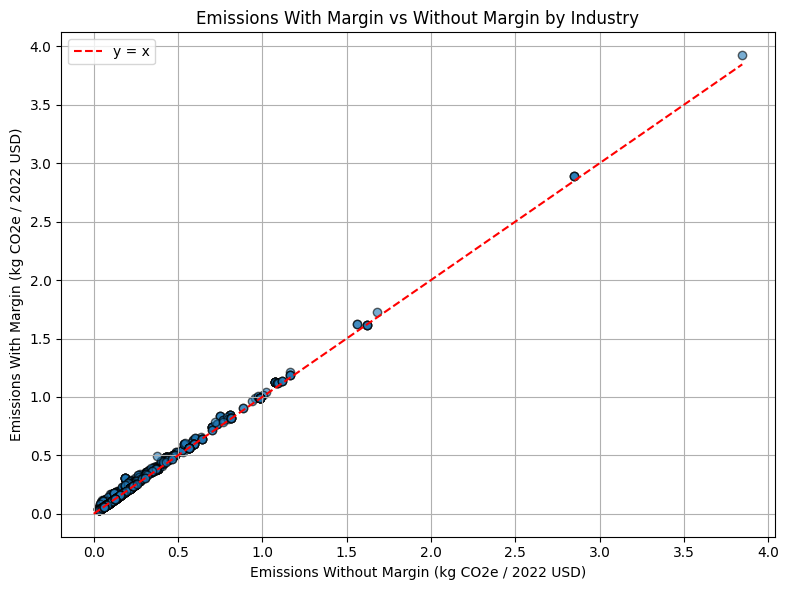

In [53]:
plt.figure(figsize=(8, 6))
plt.scatter(df2['Emissions_Without_Margin'], df2['Emissions_With_Margin'], alpha=0.6, edgecolor='k')
plt.plot([0, df2['Emissions_Without_Margin'].max()], 
         [0, df2['Emissions_Without_Margin'].max()], 
         color='red', linestyle='--', label='y = x')
plt.title('Emissions With Margin vs Without Margin by Industry')
plt.xlabel('Emissions Without Margin (kg CO2e / 2022 USD)')
plt.ylabel('Emissions With Margin (kg CO2e / 2022 USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 11. Summary

- The industries with the highest emissions intensity are **Cement Manufacturing**, **Dual-Purpose Cattle Ranching and Farming**, **Cattle Feedlots**, **Beef Cattle Ranching and Farming**, and **Dairy Cattle and Milk Production**.
- On average, margins increase supply chain emission factors by approximately **100%**. This indicates a substantial correlation between margin pressures and emission outcomes across these sectors.
- Some industries like **Lawn and Garden Equipement Manufacturing**, **Primary Battery Manufacturing**, **Software Publishers**, and **Pharmaceutical Preparation Manufacturing** show a much larger margin impact, indicating significant added emissions through retail/distribution markups.
- This indicates that making procurement choices in industries with high margin-related emissions could significantly help lower the overall carbon footprint.

## 12. Grouping NAICS Codes by Sector

In [54]:
def map_sector(naics_code):
    str_code = str(naics_code)
    if str_code.startswith('11'):
        return 'Agriculture, Forestry, Fishing and Hunting'
    elif str_code.startswith('21'):
        return 'Mining, Quarrying, and Oil and Gas Extraction'
    elif str_code.startswith('22'):
        return 'Utilities'
    elif str_code.startswith('23'):
        return 'Construction'
    elif str_code.startswith(('31', '32', '33')):
        return 'Manufacturing'
    elif str_code.startswith('42'):
        return 'Wholesale Trade'
    elif str_code.startswith('44') or str_code.startswith('45'):
        return 'Retail Trade'
    elif str_code.startswith('48') or str_code.startswith('49'):
        return 'Transportation and Warehousing'
    elif str_code.startswith('51'):
        return 'Information'
    elif str_code.startswith('52'):
        return 'Finance and Insurance'
    elif str_code.startswith('53'):
        return 'Real Estate and Rental and Leasing'
    elif str_code.startswith('54'):
        return 'Professional, Scientific, and Technical Services'
    elif str_code.startswith('55'):
        return 'Management of Companies and Enterprises'
    elif str_code.startswith('56'):
        return 'Administrative and Support and Waste Management and Remediation Services'
    elif str_code.startswith('61'):
        return 'Educational Services'
    elif str_code.startswith('62'):
        return 'Health Care and Social Assistance'
    elif str_code.startswith('71'):
        return 'Arts, Entertainment, and Recreation'
    elif str_code.startswith('72'):
        return 'Accommodation and Food Services'
    elif str_code.startswith('81'):
        return 'Other Services (except Public Administration)'
    elif str_code.startswith('92'):
        return 'Public Administration'
    else:
        return 'Other'

df2['Sector_Group'] = df2['NAICS_Code'].astype(str).apply(map_sector)

# Check emission averages by sector group
sector_summary = df2.groupby('Sector_Group')['Emissions_With_Margin'].mean().sort_values(ascending=False)
print(sector_summary)


Sector_Group
Agriculture, Forestry, Fishing and Hunting                                  0.726625
Utilities                                                                   0.566500
Transportation and Warehousing                                              0.518737
Mining, Quarrying, and Oil and Gas Extraction                               0.432321
Manufacturing                                                               0.350880
Administrative and Support and Waste Management and Remediation Services    0.333045
Construction                                                                0.226226
Accommodation and Food Services                                             0.150400
Real Estate and Rental and Leasing                                          0.146708
Arts, Entertainment, and Recreation                                         0.139720
Health Care and Social Assistance                                           0.133564
Retail Trade                                        

## 13. Bar chart showing Sector Level Emissions 

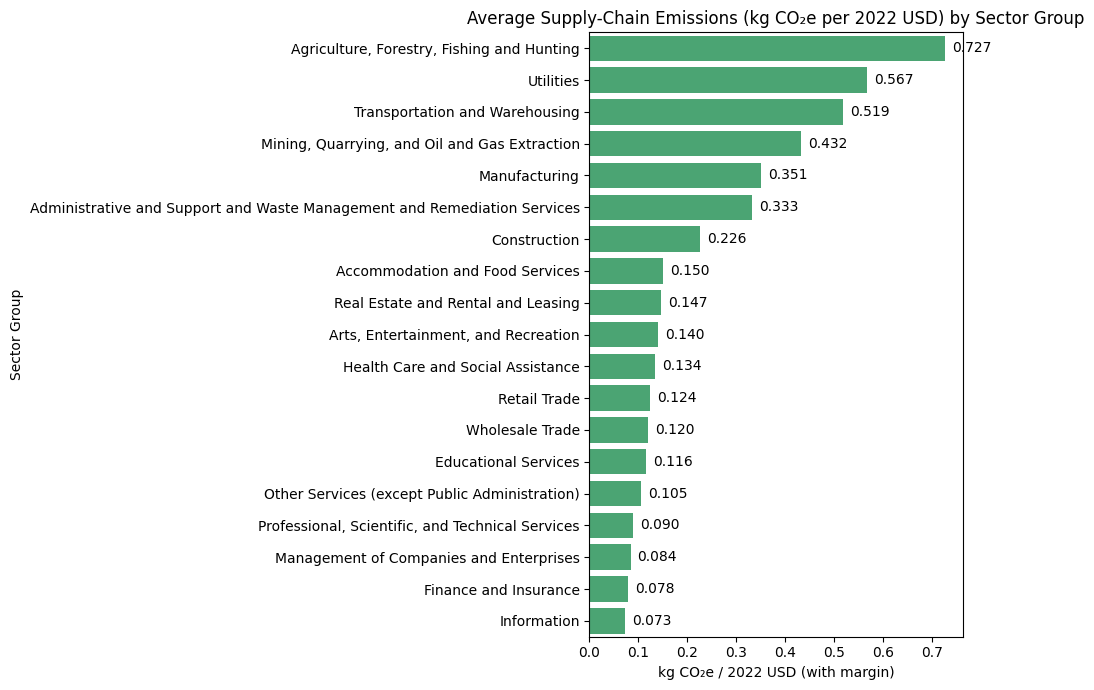

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# ----- 1.  create the summary table if you haven’t already -----
sector_summary = (
    df2.groupby('Sector_Group')['Emissions_With_Margin']
        .mean()
        .sort_values(ascending=False)
)

# ----- 2.  build a neat horizontal bar chart with labels ----------
plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    y=sector_summary.index,
    x=sector_summary.values,
    color="mediumseagreen"
)

plt.title("Average Supply-Chain Emissions (kg CO₂e per 2022 USD) by Sector Group")
plt.xlabel("kg CO₂e / 2022 USD (with margin)")
plt.ylabel("Sector Group")

# Add value labels to each bar
for i, v in enumerate(sector_summary.values):
    plt.text(v + 0.02 * sector_summary.max(),                    # small offset
             i, 
             f"{v:.3f}", 
             va='center')

plt.tight_layout()
plt.show()


### Conclusion
- **Highest-intensity sectors**: Agriculture, Utilities, Transportation, Mining, and Manufacturing.
- **Margin effect**: Across all NAICS sectors, profit margins inflate emission factors by an average of **111.84 %** (median **120 %**), with some retail-heavy subsectors exceeding the median.
- **Procurement insight**: Redirecting spend away from sectors where margin-related emissions are disproportionately high (e.g., certain wholesale and retail activities) could significantly lower total Scope 3 footprints.
